In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from ma3 import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [14]:
df_dict = {}
# candidate = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
candidate = ['ADA','ETC','BTC','ETH','BCH','AAVE','AVAX','MATIC','XLM','MKR','APT','EGLD','GRT','ALGO']
for coin in candidate:
    df_dict[coin] = get_data(coin)

In [15]:
df_dict['SOL'] = get_data('SOL')

Start                               2022-01-01 00:00:00
End                                 2023-11-07 00:00:00
Period                                675 days 01:00:00
Start Value                                     10000.0
Min Value                                     9997.0009
Max Value                                  37620.655012
End Value                                  36010.514118
Total Return [%]                             260.105141
Benchmark Return [%]                         -75.533643
Total Time Exposure [%]                       29.146349
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              16.283105
Max Drawdown Duration                 121 days 15:00:00
Total Orders                                        160
Total Fees Paid                              493.800038
Total Trades                                         82
Win Rate [%]                                  42.682927
Best Trade [%]                                46

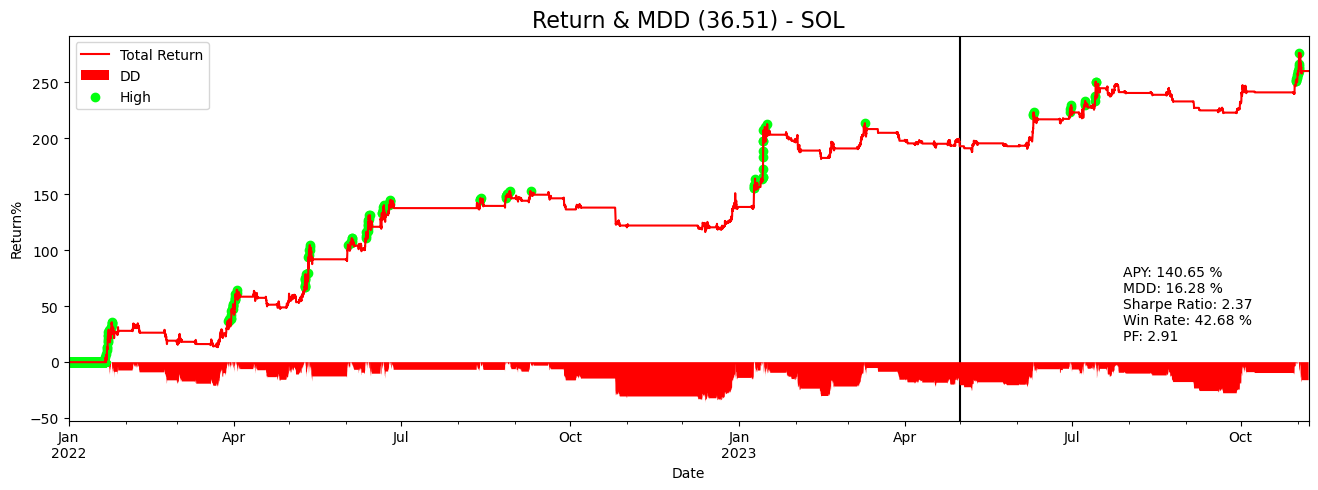

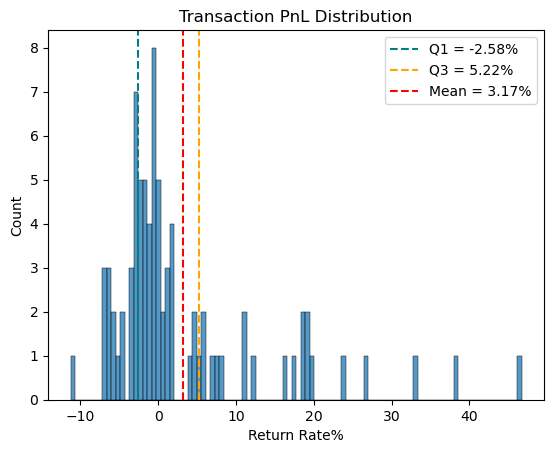

In [24]:
start = '2022-01-01'
sep = ''
end = ''

# params = {'short_window_l': 20, 'middle_window_l': 58, 'long_window_l': 120, 'short_window_s': 28, 'middle_window_s': 62, 'long_window_s': 120, 'upper_bound': 90}

params = {"short_window_l": 24.0,
        "middle_window_l": 56.0,
        "long_window_l": 140.0,
        "short_window_s": 24.0,
        "middle_window_s": 64.0,
        "long_window_s": 132.0}

side = 'both'
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

<AxesSubplot:xlabel='Entry Index'>

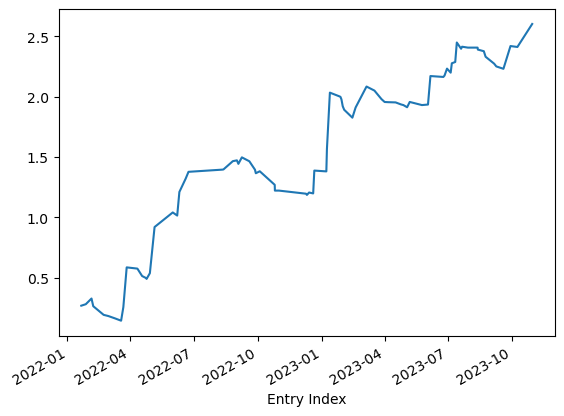

In [25]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= ADA LONG Optimize Test =======================
Optimization trails: 2352


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Pl

Optimization time: 77.36 sec
---------- ADA LONG ----------
{'short_window_l': 12, 'middle_window_l': 8, 'long_window_l': 28, 'short_window_s': 20, 'middle_window_s': 50, 'long_window_s': 120}
APY: 73.13 %
MDD: 23.30 %
MDD Duration 141 days 23:00:00
worst trade: -8.62 %
2022-01-08 08:00:00 ~ 2022-01-08 18:00:00
avg holding days: 0.75 days
--------------------------------------------
PF: 1.66
Sharpe Ratio: 1.75
Calmar Ratio: 2.85
Sortino Ratio: 2.73
Omega Ratio: 1.13
--------------------------------------------
Expectancy : 0.64 %
Total Time Exposure : 23.60 %
Total Trades: 153
Win Rate: 41.18 %
--------------------------------------------
PF * Win Rate: 0.685


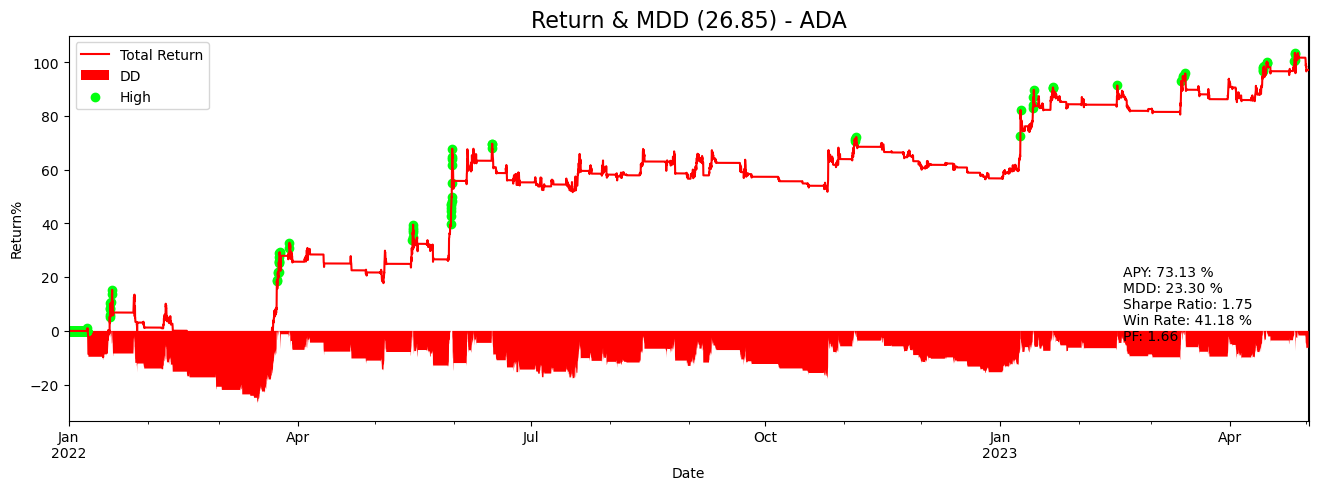

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     28.2  | 5675.7  | -3097.93 |       1.83 |   31.82 |         22 |
| 2022-06    |     29.54 | 5670.83 | -2716.77 |       2.09 |   38.1  |         21 |
| 2022-09    |      2.08 | 3020.17 | -2812.48 |       1.07 |   44.12 |         34 |
| 2022-12    |     -0.59 | 2338.73 | -2397.91 |       0.98 |   28.57 |         28 |
| 2023-03    |     34.1  | 5915.62 | -2505.52 |       2.36 |   51.43 |         35 |
| 2023-06    |      6.27 | 1727.08 | -1100.28 |       1.57 |   53.85 |         13 |
+------------+-----------+---------+----------+------------+---------+------------+
-------------------1h is done----------------------
======================= ADA SHORT Optimize Test =======================
Optimization trails: 2352


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2352 out of 2352 | elapsed:  1.4min finished


Optimization time: 81.86 sec
---------- ADA SHORT ----------
{'short_window_l': 20, 'middle_window_l': 50, 'long_window_l': 120, 'short_window_s': 36, 'middle_window_s': 20, 'long_window_s': 12}
APY: 90.85 %
MDD: 16.77 %
MDD Duration 98 days 07:00:00
worst trade: -10.99 %
2023-02-13 16:00:00 ~ 2023-02-14 23:00:00
avg holding days: 1.95 days
--------------------------------------------
PF: 2.77
Sharpe Ratio: 2.17
Calmar Ratio: 4.84
Sortino Ratio: 3.36
Omega Ratio: 1.16
--------------------------------------------
Expectancy : 1.89 %
Total Time Exposure : 25.67 %
Total Trades: 64
Win Rate: 59.38 %
--------------------------------------------
PF * Win Rate: 1.642


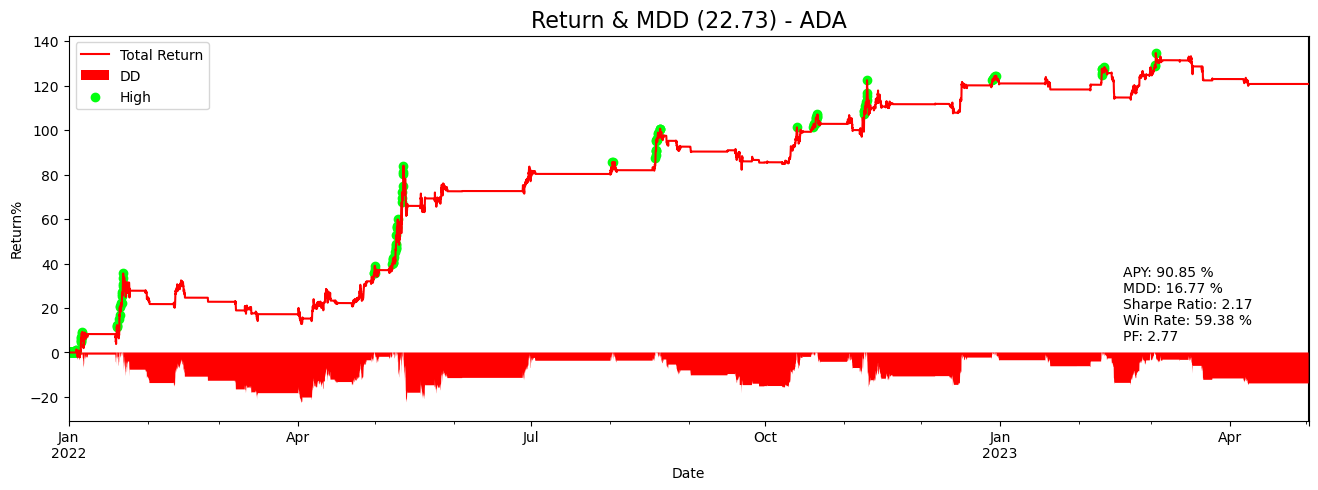

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     15.26 | 3431.07 | -1904.98 |       1.8  |   36.36 |         11 |
| 2022-06    |     66.29 | 6865.29 |  -236.31 |      29.05 |   76.92 |         13 |
| 2022-09    |      3.94 | 1849.73 | -1455.54 |       1.27 |   41.67 |         12 |
| 2022-12    |     35.46 | 4288.19 |  -741.86 |       5.78 |   78.57 |         14 |
| 2023-03    |      1.99 | 2475.05 | -2276.18 |       1.09 |   61.54 |         13 |
| 2023-06    |     -2.23 |    0    |  -222.65 |       0    |    0    |          1 |
+------------+-----------+---------+----------+------------+---------+------------+
-------------------1h is done----------------------


In [3]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['']
sample_sets = [[start,end]]
# freq = '1h'


for direction in ['long','short']:
    if direction == 'long':
        params={"short_window_l": [12,60,4],
                "middle_window_l": [4,60,4],
                "long_window_l": [4,60,4],
                "short_window_s": [20,30,10],
                "middle_window_s": [50,60,10],
                "long_window_s": [120,130,10]}
    else:
        params={"short_window_l": [20,30,10],
                "middle_window_l": [50,60,10],
                "long_window_l": [120,130,10],
                "short_window_s": [12,60,4],
                "middle_window_s": [4,60,4],
                "long_window_s": [4,60,4]}
    
    config = {'freq':'1h','fee': 0.0003}
    multi_test = MultiTester(
        Strategy,
        get_data_func=get_data,
        params=params,
        config=config,
        symbol_list=symbol_list,
        start=start,
        end=end
        )

    all_params = multi_test.multi_params(symbol_list,sample_sets,direction=direction)
    trades, value_df = multi_test.multi_params_result(all_params)
    print(f'-------------------1h is done----------------------')
